## Specific humidity (hus) - one model
With this variable we can identify drying in different parts of the atmosphere

In [33]:
import xarray as xr
import numpy as np
import skimage.measure as skm
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

from cmip5_metrics.funcs.vars.myFuncs import *
from cmip5_metrics.funcs.vars.myPlots import *
from cmip5_metrics.funcs.vars.husVars import *
from cmip5_metrics.funcs.husFuncs import *
from cmip5_metrics.funcs.aggFuncs import *

import timeit

switch = {
    'local_files': True, 
    'nci_files': False, 
}

In [34]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]

### from historical or rcp scenario

In [35]:
experiments = [
    'historical',
    #'rcp85'
    ]
experiment = experiments[0]       


if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + 'ds'
    fileName = model + '_hus_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    hus = ds.hus

if switch['nci_files']:
    hus = get_hus(model, experiment)

In [36]:
hus

<xarray.DataArray 'hus' (time: 10950, plev: 8, lat: 22, lon: 128)>
[246681600 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

Text(-375, 475, 'tMean Specific humidity at different pressure levels historical')

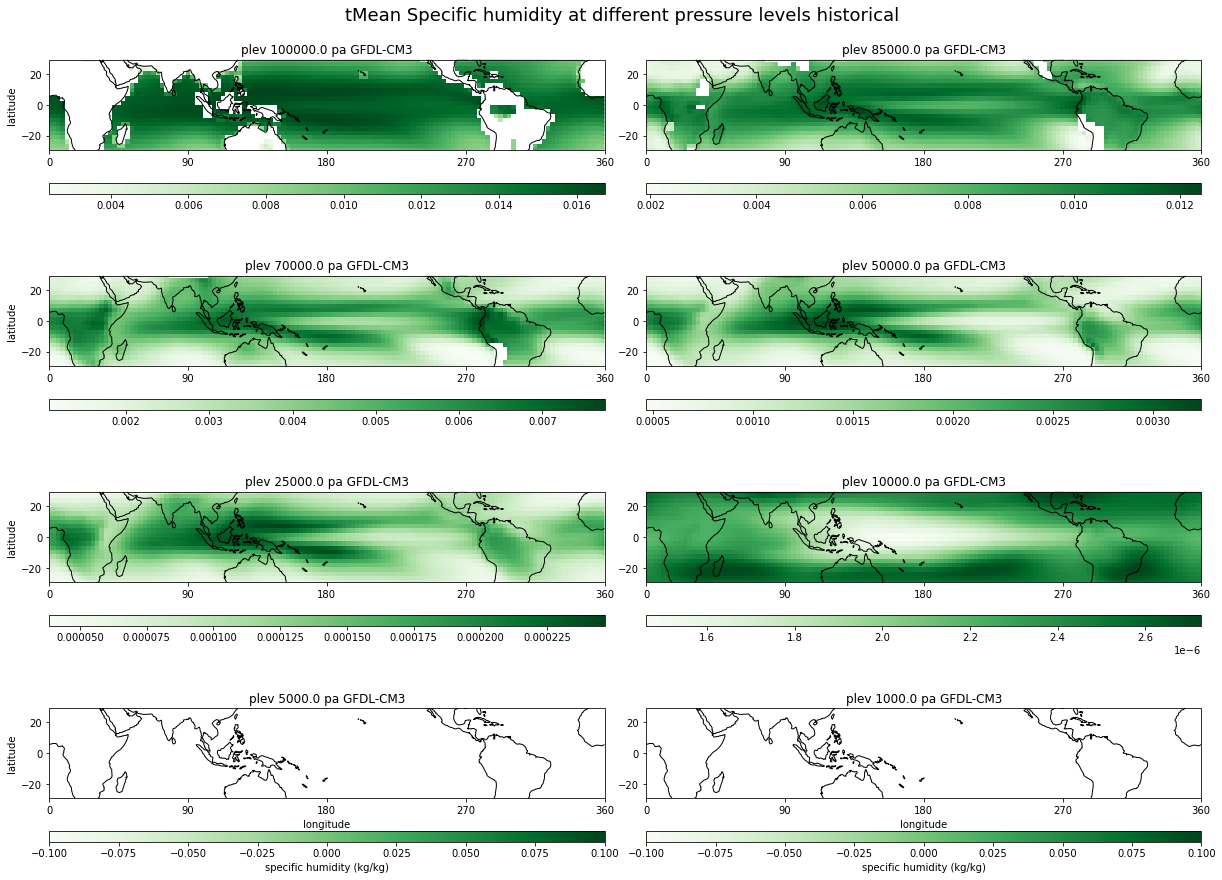

In [37]:
plevs = hus['plev']
lat = hus.lat
lon = hus.lon
lonm,latm = np.meshgrid(lon,lat)

fig, axs = plt.subplots(4, 2, figsize=(20, 15),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

 
for ax, plev in zip(axs.flat, plevs):

    pcm= ax.pcolormesh(lonm,latm, hus.mean(dim='time').sel(plev = plev),transform=ccrs.PlateCarree(),zorder=0, cmap='Greens') #,vmin=0,vmax=12)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)

    if plev <= 5000:
        ax.set_xlabel('longitude')
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055, label = 'specific humidity (kg/kg)')
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055)

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.075, hspace=0.001)
plt.text(-375,475, 'tMean Specific humidity at different pressure levels ' + experiment,fontsize=18)


[Text(0, 0, '100000.0'),
 Text(1, 0, '85000.0'),
 Text(2, 0, '70000.0'),
 Text(3, 0, '50000.0'),
 Text(4, 0, '25000.0'),
 Text(5, 0, '10000.0'),
 Text(6, 0, '5000.0'),
 Text(7, 0, '1000.0')]

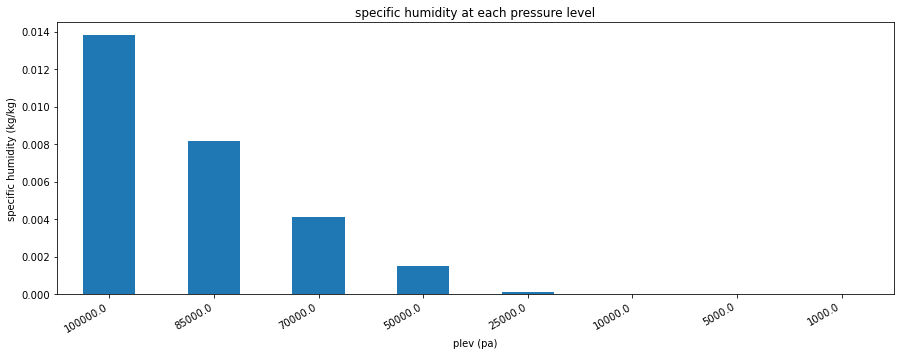

In [39]:
aWeights = np.cos(np.deg2rad(hus.lat))

fig, ax = plt.subplots(figsize = (15,5))
hus.weighted(aWeights).mean(dim=('lat', 'lon')).mean(dim='time').to_series().plot.bar(ax=ax)
ax.set_title('specific humidity at each pressure level')
ax.set_xlabel("plev (pa)")
ax.set_ylabel("specific humidity (kg/kg)")
ax.set_xticklabels(hus['plev'].data, rotation=30, ha='right')


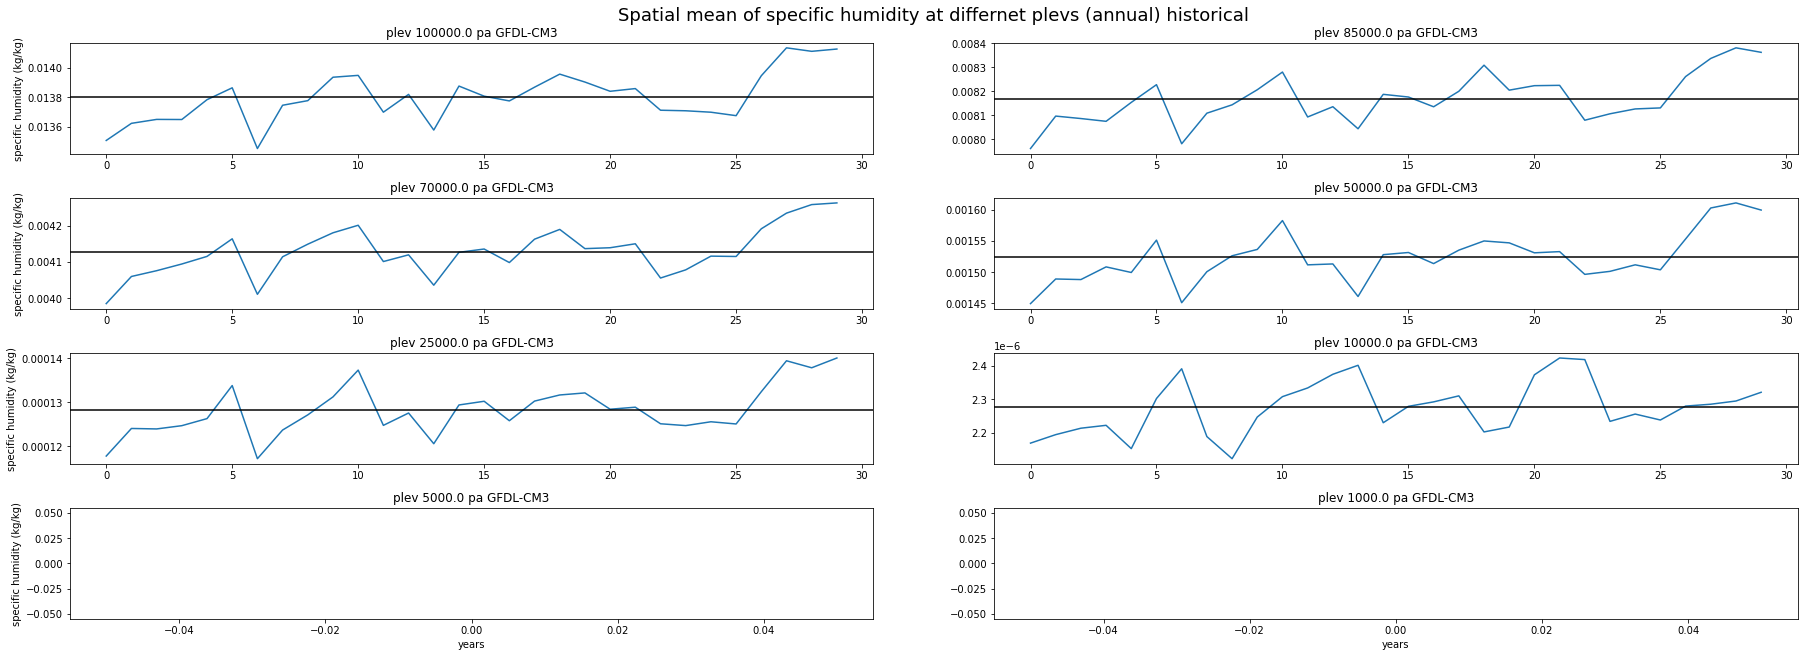

In [40]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize = (30,10))
f.suptitle('Spatial mean of specific humidity at differnet plevs (annual) ' + experiment, fontsize=18, y=0.95)

plevs = hus['plev']

for ax, plev in zip(axes.flat, plevs):

    ax.plot(hus.weighted(aWeights).mean(dim=('lat', 'lon')).sel(plev = plev).resample(time='Y').mean(dim='time'))
    ax.axhline(y=hus.weighted(aWeights).mean(dim=('lat', 'lon')).sel(plev = plev).mean(dim='time'), color='k')
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)


    if plev <= 5000:
        ax.set_xlabel('years')

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('specific humidity (kg/kg)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)

In [46]:
def to_monthly(da):
    year = da.time.dt.year
    month = da.time.dt.month

    # assign new coords
    da = da.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return da.set_index(time=("year", "month")).unstack("time")

In [53]:
hus_season = hus.weighted(aWeights).mean(dim=('lat', 'lon')).resample(time='QS-DEC').mean(dim="time")
hus_season = to_monthly(hus_season)
hus_season = hus_season.rename({'month':'season'})
hus_season = hus_season.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])

In [67]:
print(hus_season.season.values)

['MAM' 'JJA' 'SON' 'DJF']


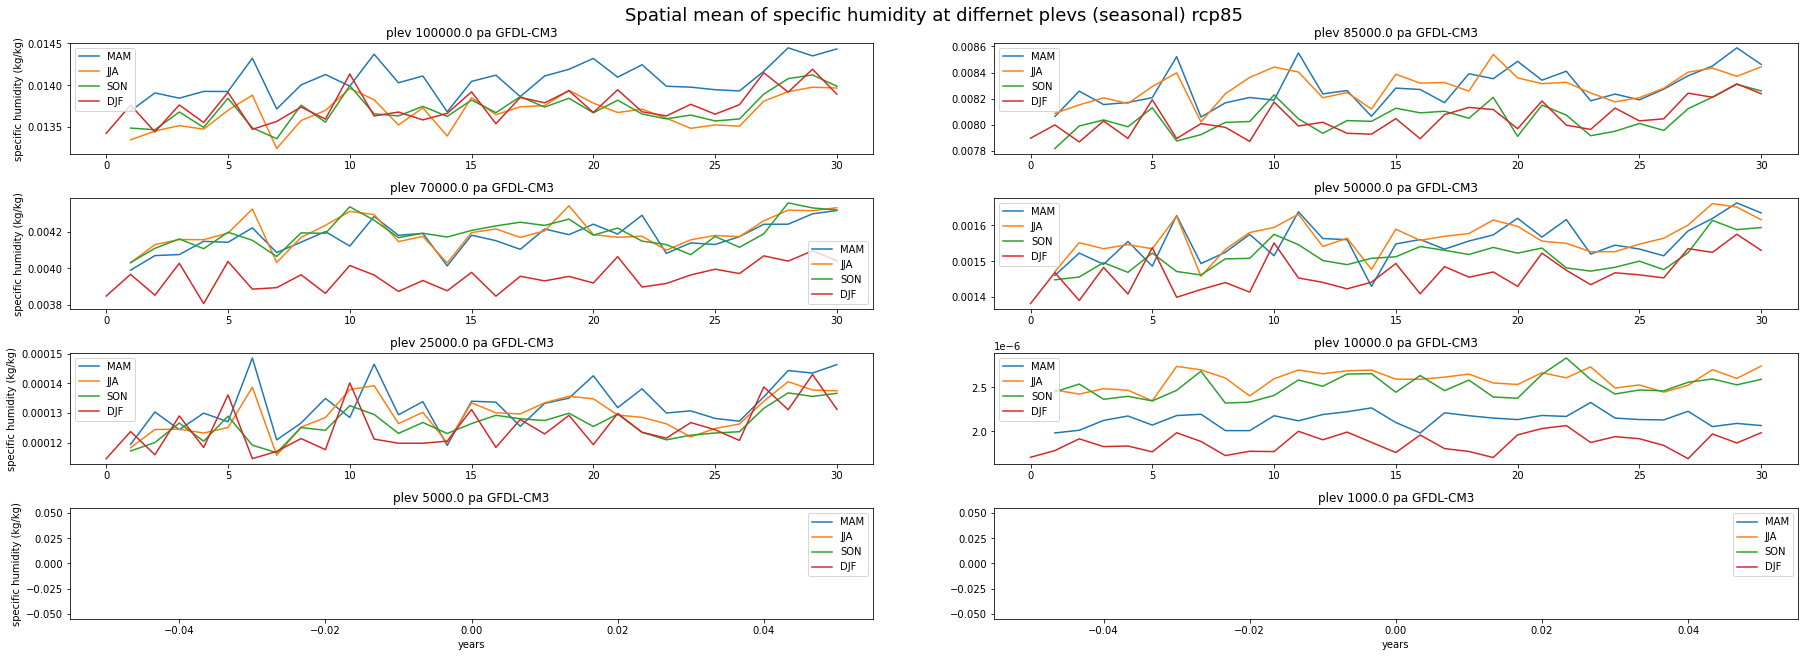

In [70]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize = (30,10))
f.suptitle('Spatial mean of specific humidity at differnet plevs (seasonal) ' + experiment, fontsize=18, y=0.95)

plevs = hus['plev']

for ax, plev in zip(axes.flat, plevs):

    ax.plot(hus_season.sel(plev = plev), label = hus_season.season.values)
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)
    ax.legend()

    if plev <= 5000:
        ax.set_xlabel('years')

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('specific humidity (kg/kg)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)

In [72]:
hus_monthly = to_monthly(hus.weighted(aWeights).mean(dim=('lat', 'lon')))
hus_monthly = hus_monthly.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])

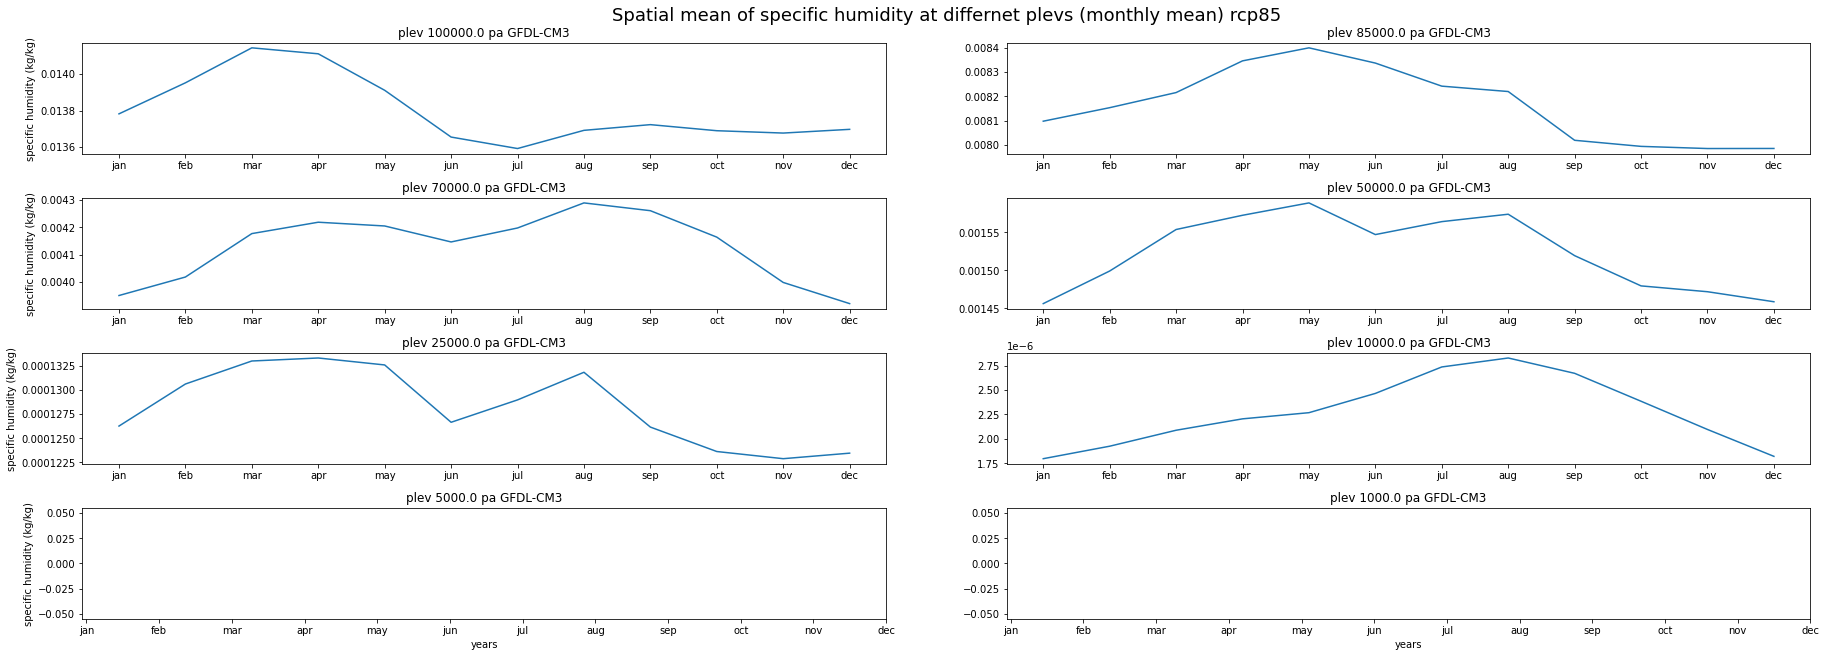

In [78]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize = (30,10))
f.suptitle('Spatial mean of specific humidity at differnet plevs (monthly mean) ' + experiment, fontsize=18, y=0.95)

plevs = hus['plev']

for ax, plev in zip(axes.flat, plevs):

    ax.plot(hus_monthly.sel(plev = plev).mean(dim='year'))
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(hus_monthly.month.values)

    if plev <= 5000:
        ax.set_xlabel('years')

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('specific humidity (kg/kg)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)

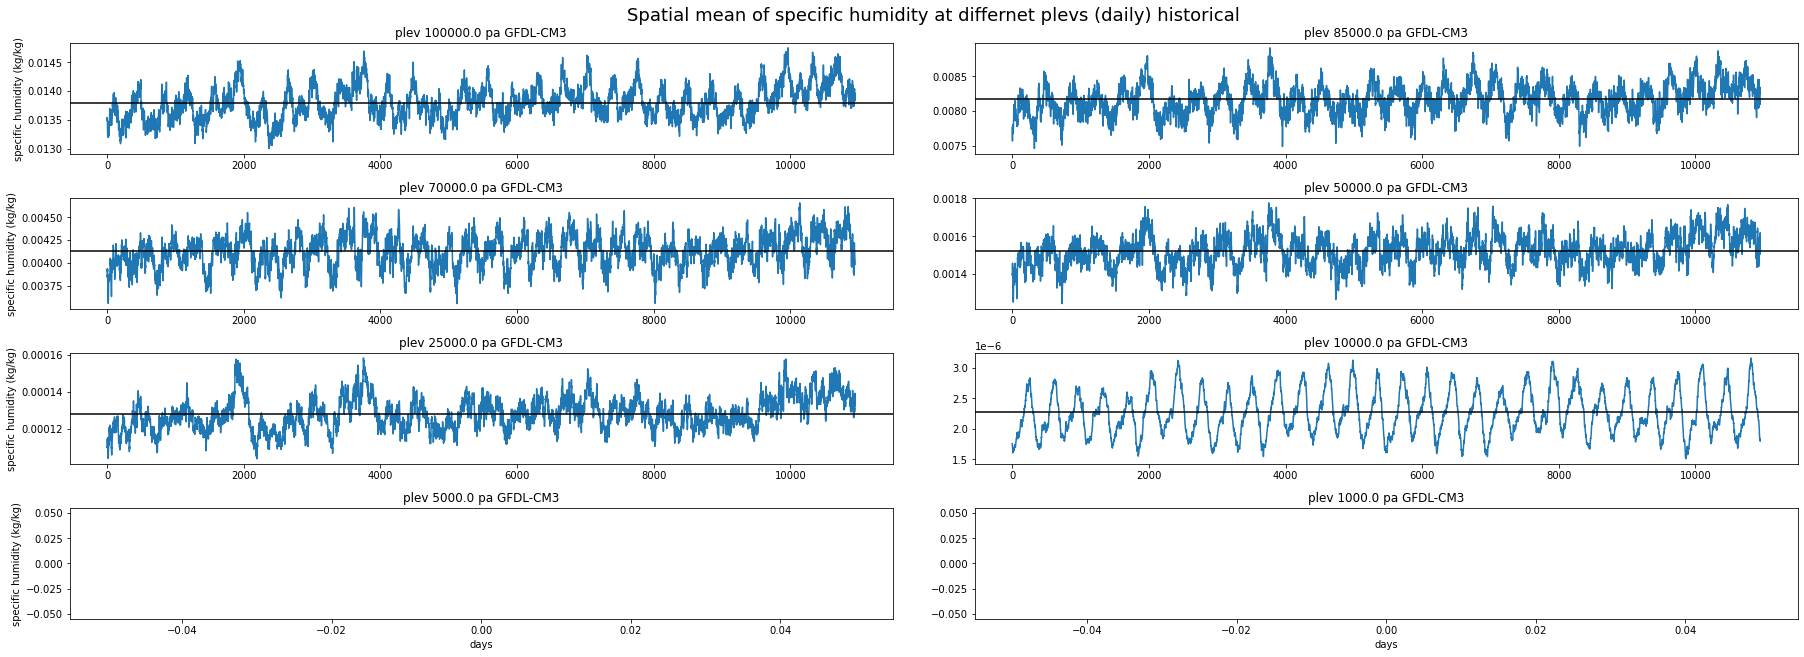

In [41]:
f, axes = plt.subplots(nrows=4, ncols=2, figsize = (30,10))
f.suptitle('Spatial mean of specific humidity at differnet plevs (daily) ' + experiment, fontsize=18, y=0.95)

plevs = hus['plev']

for ax, plev in zip(axes.flat, plevs):

    ax.plot(hus.weighted(aWeights).mean(dim=('lat', 'lon')).sel(plev = plev))
    ax.axhline(y=hus.weighted(aWeights).mean(dim=('lat', 'lon')).sel(plev = plev).mean(dim='time'), color='k')
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)
    #ax.set_ylim(0,0.015)

    if plev <= 5000:
        ax.set_xlabel('days')

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('specific humidity (kg/kg)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.4)

### from difference between scenarios

In [42]:
experiments = [
    'historical',
    #'rcp85'
    ]
experiment = experiments[0]       


if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + 'ds'
    fileName = model + '_hus_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    hus = ds.hus

if switch['nci_files']:
    hus = get_hus(model, experiment)


experiments = [
    #'historical',
    'rcp85'
    ]
experiment = experiments[0]       


if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + 'ds'
    fileName = model + '_hus_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    hus_rcp = ds.hus

if switch['nci_files']:
    hus_rcp = get_hus(model, experiment)


# hus_diff = hus_rcp - hus

In [43]:
hus_diff = xr.DataArray(
        data=hus_rcp.values - hus.values,
        dims=['time','plev','lat', 'lon'],
        coords={'time': hus.time.data, 'plev': hus.plev.data, 'lat': hus.lat.data, 'lon': hus.lon.data},
        attrs={'units':'kg/kg'}
        )

Text(-375, 475, 'Moistening with warming at different pressure levels rcp85')

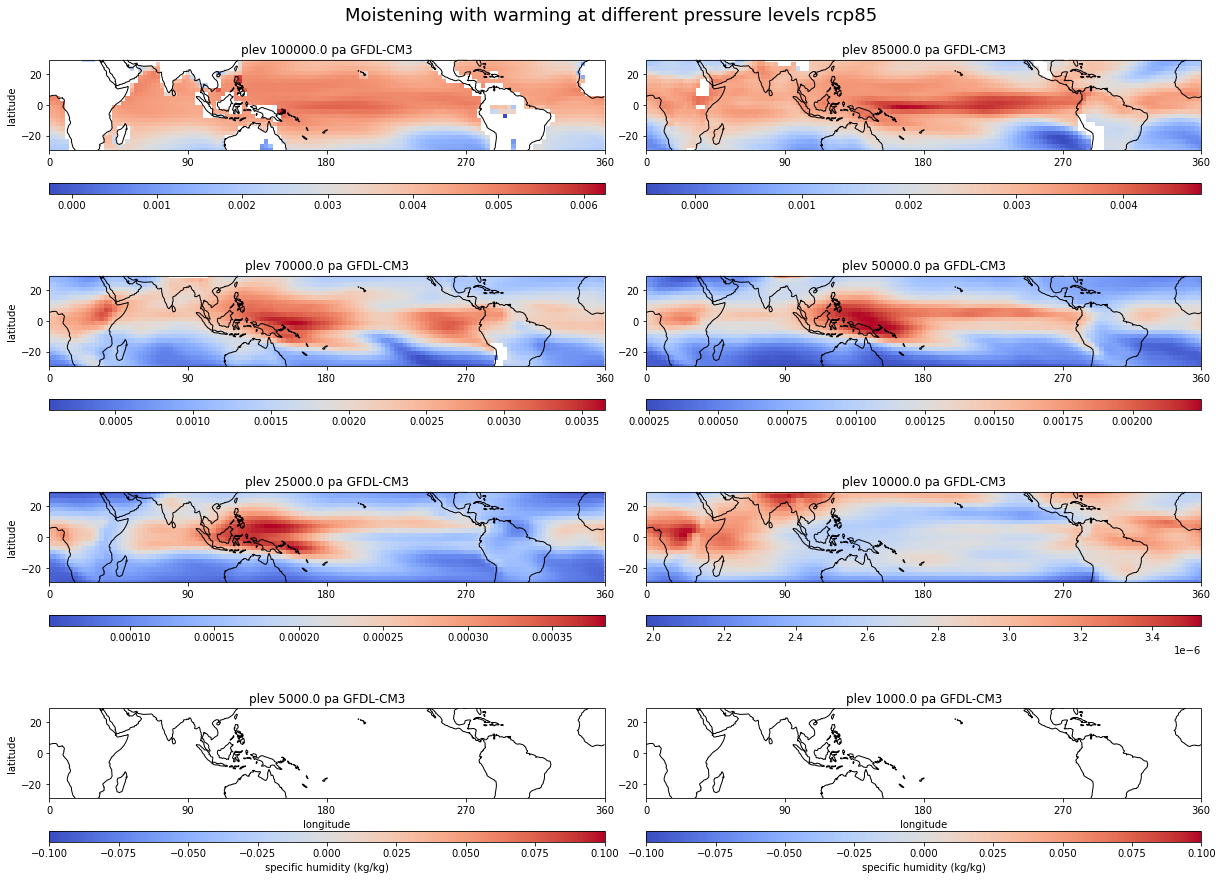

In [44]:
plevs = hus['plev']
lat = hus.lat
lon = hus.lon
lonm,latm = np.meshgrid(lon,lat)

fig, axs = plt.subplots(4, 2, figsize=(20, 15),
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

 
for ax, plev in zip(axs.flat, plevs):

    pcm= ax.pcolormesh(lonm,latm, hus_diff.mean(dim='time').sel(plev = plev),transform=ccrs.PlateCarree(),zorder=0, cmap='coolwarm') #,vmin=0,vmax=12)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title('plev ' + str(plev.data) + ' pa ' + model)

    if plev <= 5000:
        ax.set_xlabel('longitude')
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055, label = 'specific humidity (kg/kg)')
    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055)

    if plev == 100000 or plev ==70000 or plev == 25000 or plev ==5000:
        ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.075, hspace=0.001)
plt.text(-375,475, 'Moistening with warming at different pressure levels ' + experiment,fontsize=18)


[Text(0, 0, '100000.0'),
 Text(1, 0, '85000.0'),
 Text(2, 0, '70000.0'),
 Text(3, 0, '50000.0'),
 Text(4, 0, '25000.0'),
 Text(5, 0, '10000.0'),
 Text(6, 0, '5000.0'),
 Text(7, 0, '1000.0')]

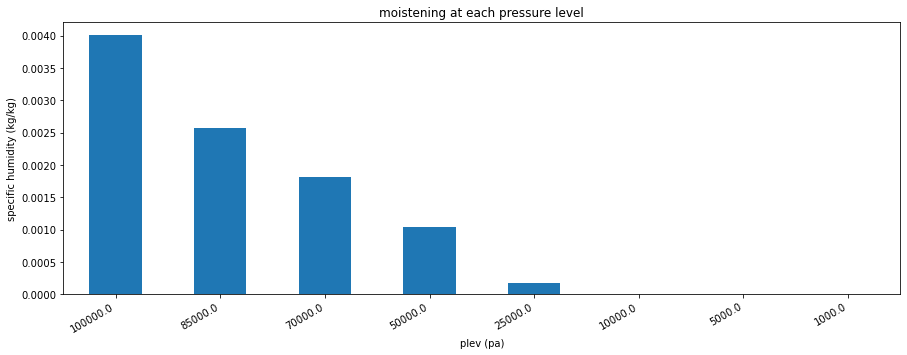

In [45]:
aWeights = np.cos(np.deg2rad(hus.lat))

fig, ax = plt.subplots(figsize = (15,5))
hus_diff.weighted(aWeights).mean(dim=('lat', 'lon')).mean(dim='time').to_series().plot.bar(ax=ax)
ax.set_title('moistening at each pressure level')
ax.set_xlabel("plev (pa)")
ax.set_ylabel("specific humidity (kg/kg)")
ax.set_xticklabels(hus['plev'].data, rotation=30, ha='right')

### humidity analysis as described in paper by christian